In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/housing.csv.zip')

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
X = df[['longitude', 'latitude', 'median_house_value']]

In [ ]:
import seaborn as sns

<Axes: xlabel='longitude', ylabel='latitude'>

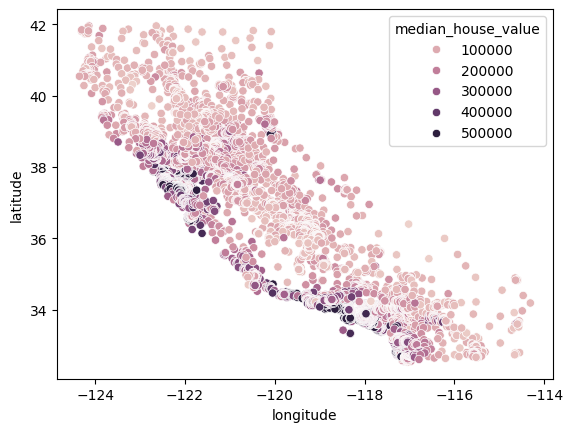

In [ ]:
sns.scatterplot(data=X, x='longitude', y='latitude', hue='median_house_value')

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X[['latitude', 'longitude']], X['median_house_value'], test_size=0.2)

In [ ]:
for i in X_train, X_test, y_train, y_test:
    print(len(i))

16512
4128
16512
4128


In [ ]:
from sklearn.preprocessing import normalize

In [ ]:
X_train_normed = normalize(X_train)
X_test_normed = normalize(X_test)

In [ ]:
pd.DataFrame(X_train_normed)

,0,1
0,0.287593,-0.957753
1,0.306385,-0.951908
2,0.294135,-0.955764
3,0.295831,-0.955240
4,0.276201,-0.961100
...,...,...
16507,0.290025,-0.957019
16508,0.269855,-0.962901
16509,0.276223,-0.961094
16510,0.299354,-0.954142


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_train_normed)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [ ]:
kmeans.labels_

array([1, 2, 1, ..., 0, 1, 1], dtype=int32)

In [ ]:
len(kmeans.labels_)

16512

In [ ]:
centroids = kmeans.cluster_centers_
centroids_map = {'x':[], 'y':[]}
for x, y in centroids:
    centroids_map['x'].append(x)
    centroids_map['y'].append(y)

print(centroids_map)

centroids_df = pd.DataFrame(centroids_map, columns=['x', 'y'])

centroids_df

{'x': [0.2759618233950908, 0.29453352505198915, 0.30676197916346715], 'y': [-0.9611632293353761, -0.9556362105769222, -0.9517717640601482]}


,x,y
0,0.275962,-0.961163
1,0.294534,-0.955636
2,0.306762,-0.951772


In [ ]:
dfnormed = pd.DataFrame(X_train_normed, columns=['longitude','latitude'])

<Axes: xlabel='longitude', ylabel='latitude'>

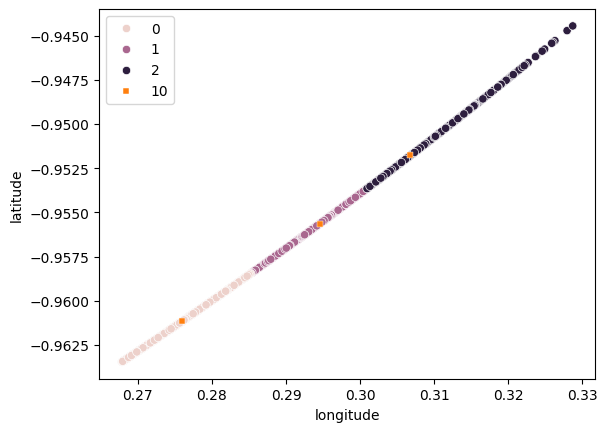

In [ ]:
sns.scatterplot(data=dfnormed, x='longitude', y='latitude', hue=kmeans.labels_)
sns.scatterplot(data=centroids_df, x='x', y='y', size=10, marker='s')

<Axes: ylabel='median_house_value'>

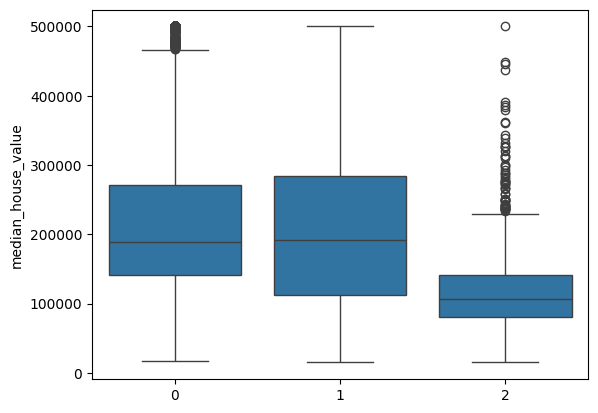

In [ ]:
sns.boxplot(x=kmeans.labels_, y=y_train)

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(X_train_normed, kmeans.labels_, metric='euclidean')

0.7497538751763668

In [ ]:
K = range(2, 8) # ----> [2, 3, 4, 5, 6, 7, 8]
fits = list()
score = list()

for k in K:
    model = KMeans(n_clusters=k)
    model.fit(X_train_normed)

    fits.append(model)

    score.append(silhouette_score(X_train_normed, model.labels_, metric='euclidean'))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

<Axes: xlabel='longitude', ylabel='latitude'>

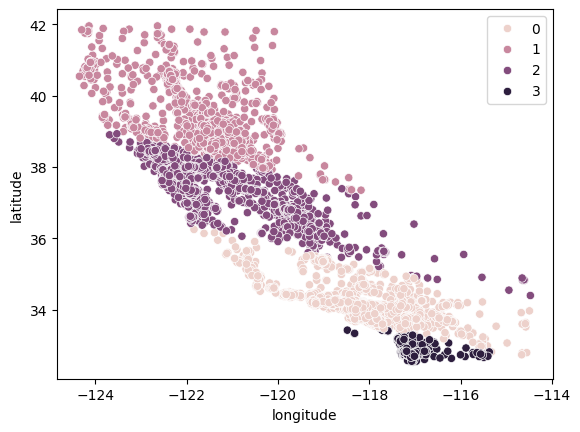

In [ ]:
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = fits[2].labels_)  # ------> k = 4

<Axes: xlabel='longitude', ylabel='latitude'>

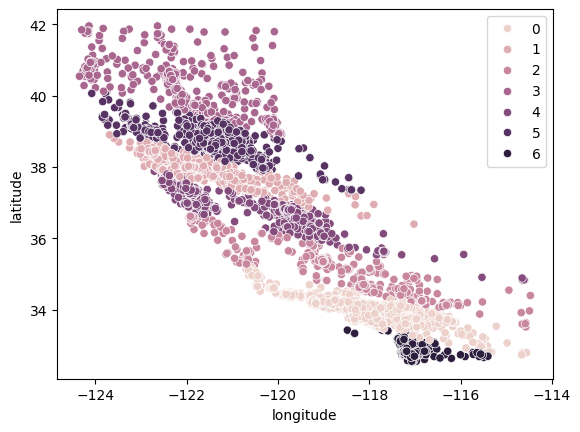

In [ ]:
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = fits[5].labels_)  # ------> k = 7

<Axes: >

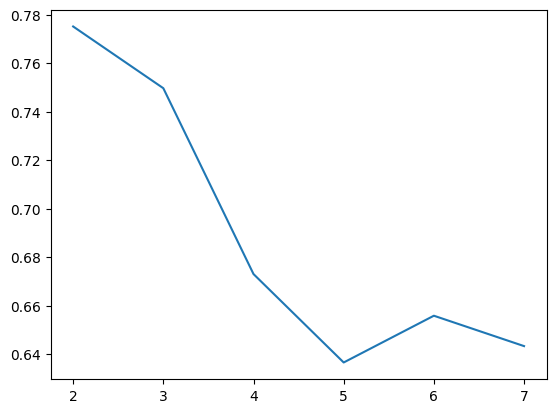

In [ ]:
sns.lineplot(x=K, y=score)

<Axes: ylabel='median_house_value'>

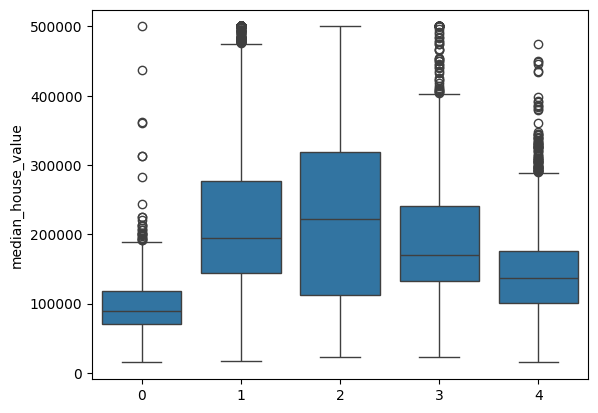

In [ ]:
sns.boxplot(x=fits[3].labels_, y=y_train)

In [ ]:
df = pd.read_csv('/content/loans.csv.gz')

In [ ]:
df.head()

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit_policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int_rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log_annual_inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days_with_cr_line  9578 non-null   float64
 8   revol_bal          9578 non-null   int64  
 9   revol_util         9578 non-null   float64
 10  inq_last_6mths     9578 non-null   int64  
 11  delinq_2yrs        9578 non-null   int64  
 12  pub_rec            9578 non-null   int64  
 13  not_fully_paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [ ]:
df = df.drop(['purpose', 'not_fully_paid'],axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit_policy      9578 non-null   int64  
 1   int_rate           9578 non-null   float64
 2   installment        9578 non-null   float64
 3   log_annual_inc     9578 non-null   float64
 4   dti                9578 non-null   float64
 5   fico               9578 non-null   int64  
 6   days_with_cr_line  9578 non-null   float64
 7   revol_bal          9578 non-null   int64  
 8   revol_util         9578 non-null   float64
 9   inq_last_6mths     9578 non-null   int64  
 10  delinq_2yrs        9578 non-null   int64  
 11  pub_rec            9578 non-null   int64  
dtypes: float64(6), int64(6)
memory usage: 898.1 KB


<Axes: >

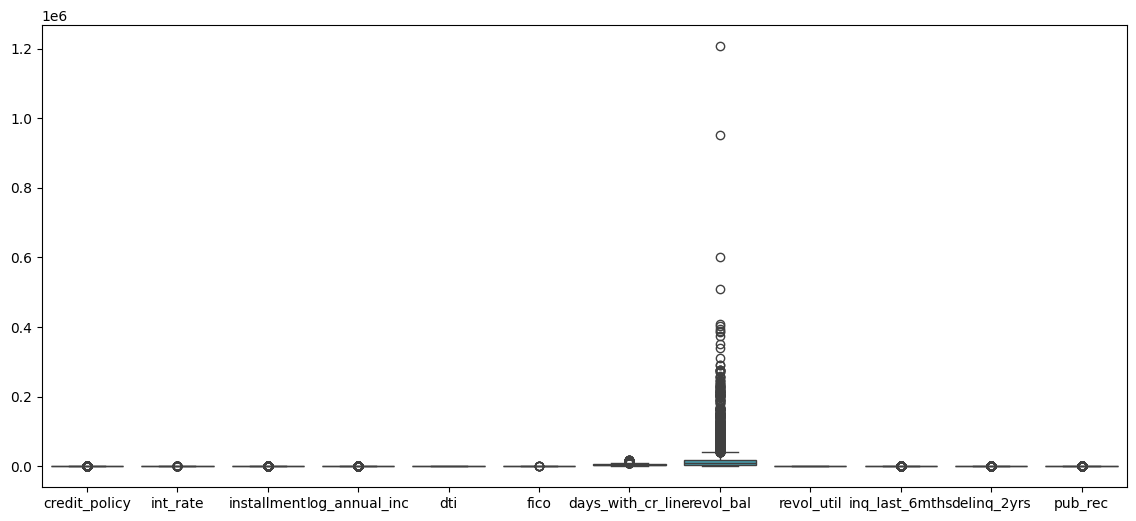

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [14,6]
sns.boxplot(data=df)

In [ ]:
def remove_outliers(data):            # Search how to do this via a pandas function
    df = data.copy()
    for col in list(df.columns):
        Q1 = df[str(col)].quantile(0.10)
        Q3 = df[str(col)].quantile(0.90)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5*IQR
        upper_bound = Q3 + 1.5*IQR

        df = df[(df[str(col)] >= lower_bound) & (df[str(col)] <= upper_bound)]
    return df

In [ ]:
dfcl = remove_outliers(df)

<Axes: >

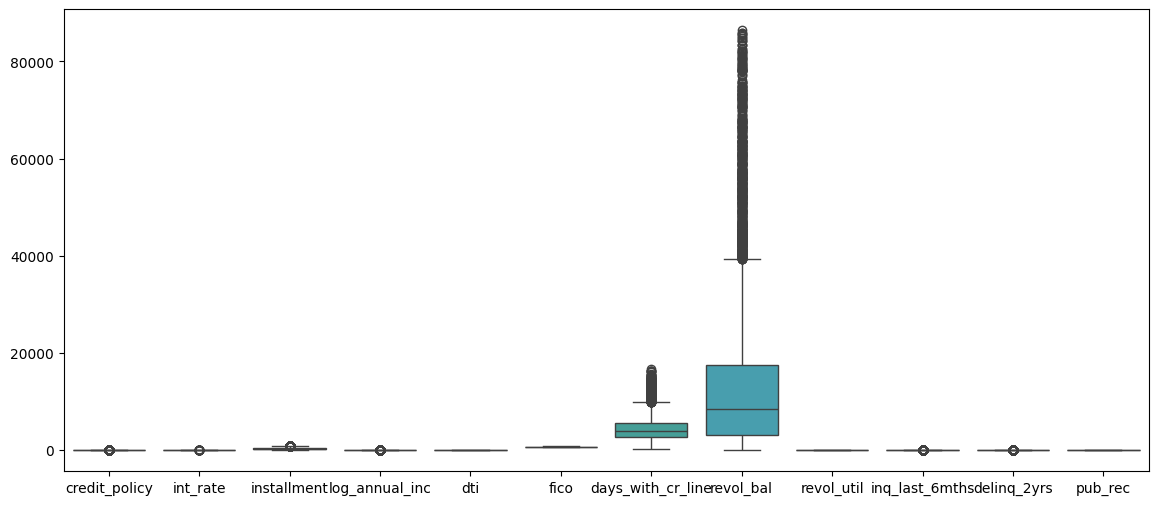

In [ ]:
plt.rcParams['figure.figsize'] = [14,6]
sns.boxplot(data=dfcl)

In [ ]:
dfcl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8632 entries, 0 to 9577
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit_policy      8632 non-null   int64  
 1   int_rate           8632 non-null   float64
 2   installment        8632 non-null   float64
 3   log_annual_inc     8632 non-null   float64
 4   dti                8632 non-null   float64
 5   fico               8632 non-null   int64  
 6   days_with_cr_line  8632 non-null   float64
 7   revol_bal          8632 non-null   int64  
 8   revol_util         8632 non-null   float64
 9   inq_last_6mths     8632 non-null   int64  
 10  delinq_2yrs        8632 non-null   int64  
 11  pub_rec            8632 non-null   int64  
dtypes: float64(6), int64(6)
memory usage: 876.7 KB


In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
dfscaled = ss.fit_transform(dfcl)

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [ ]:
complete_clustering = linkage(dfscaled, method='complete')
average_clustering = linkage(dfscaled, method='average')
single_clustering = linkage(dfscaled, method='single')

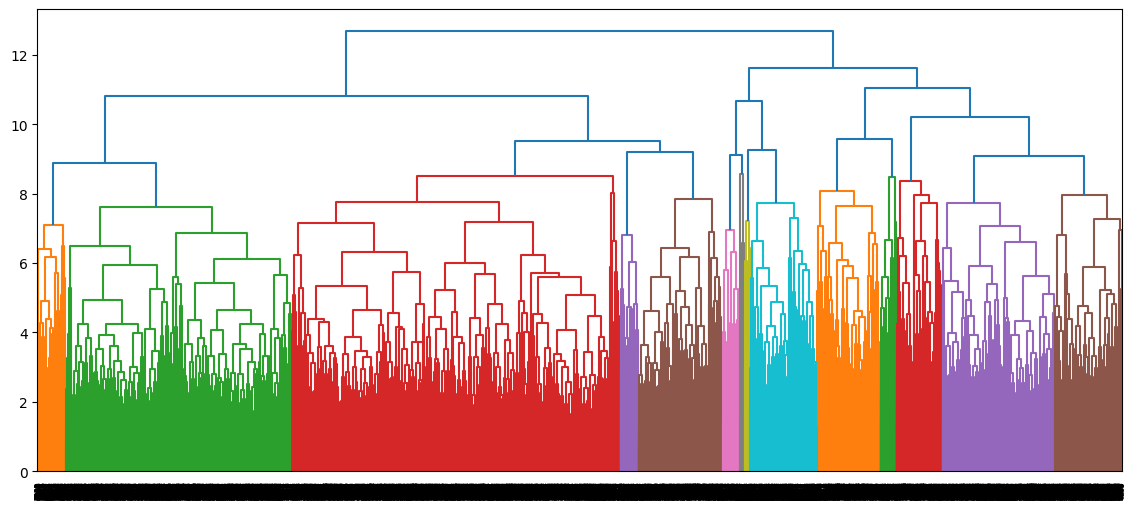

In [ ]:
dendrogram(complete_clustering)
plt.show()

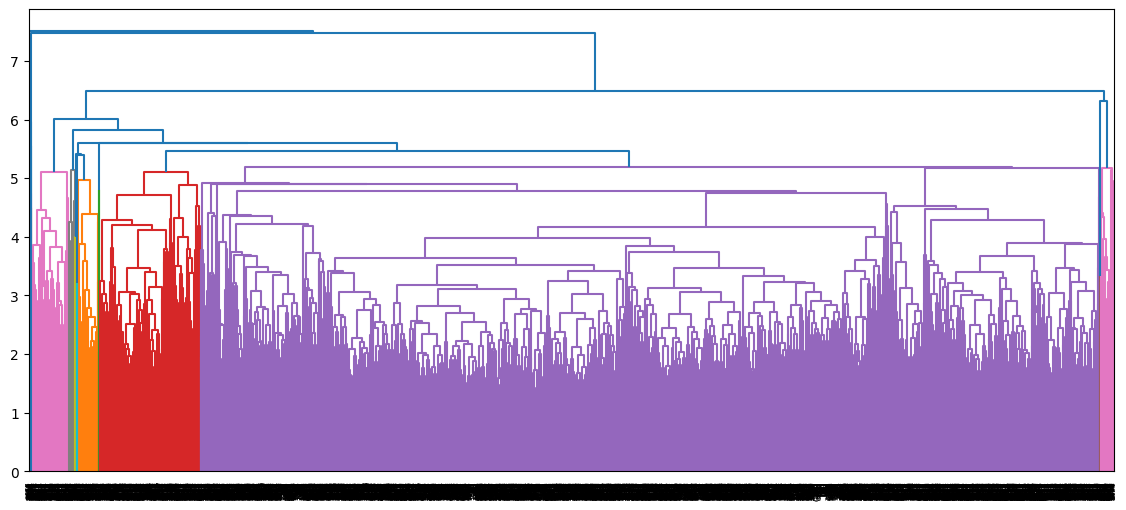

In [ ]:
dendrogram(average_clustering, truncate_mode='level')
plt.show()

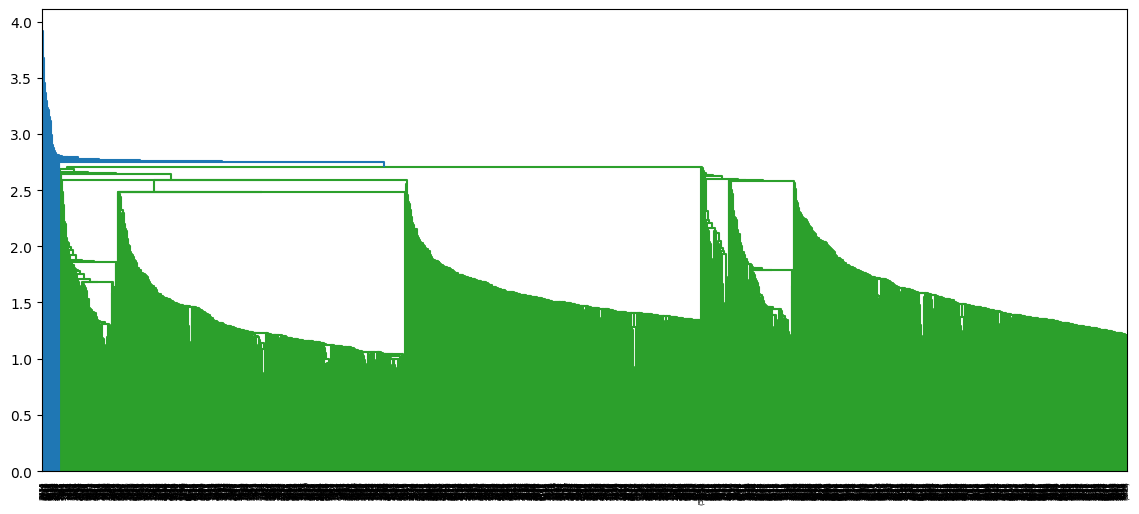

In [ ]:
dendrogram(single_clustering, p=500, truncate_mode='level')
plt.show()

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

In [66]:
X, _ = make_blobs(n_samples=300, centers=2, n_features=2, cluster_std=0.9)

In [67]:
X[:5]

array([[-0.61222817,  0.3130458 ],
       [ 0.17870214, -0.24658365],
       [ 1.10305992,  0.14752472],
       [-5.20294031, -0.52778403],
       [-5.86937648, -2.16779609]])

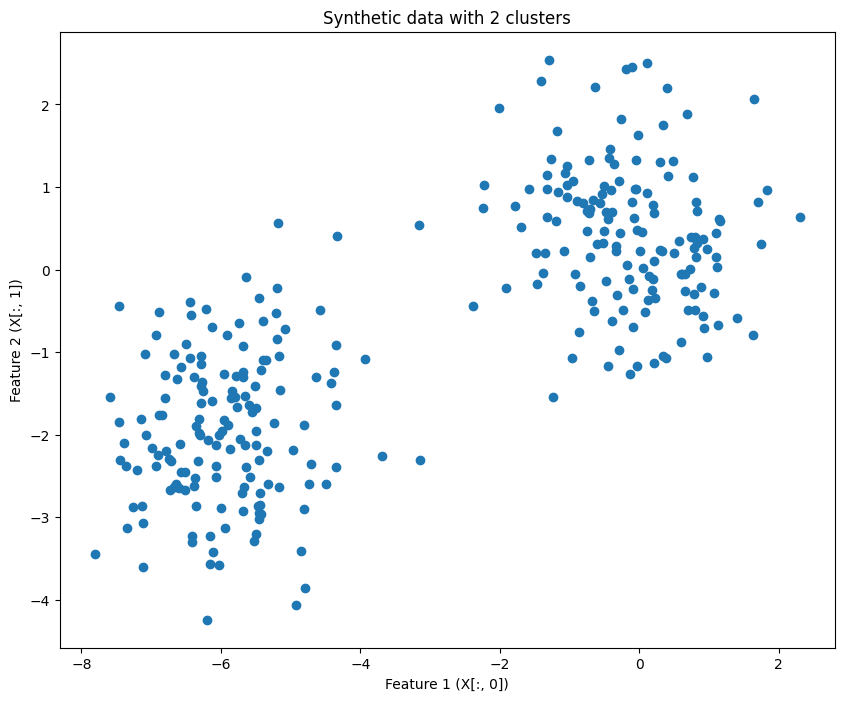

In [68]:
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1])
plt.title("Synthetic data with 2 clusters")
plt.xlabel("Feature 1 (X[:, 0])")
plt.ylabel("Feature 2 (X[:, 1])")
plt.show()

In [69]:
# n_clusters = 2, linkage = complete

In [70]:
clustering = AgglomerativeClustering(n_clusters=2, linkage='complete')
clustering.fit(X)

AgglomerativeClustering(linkage='complete')

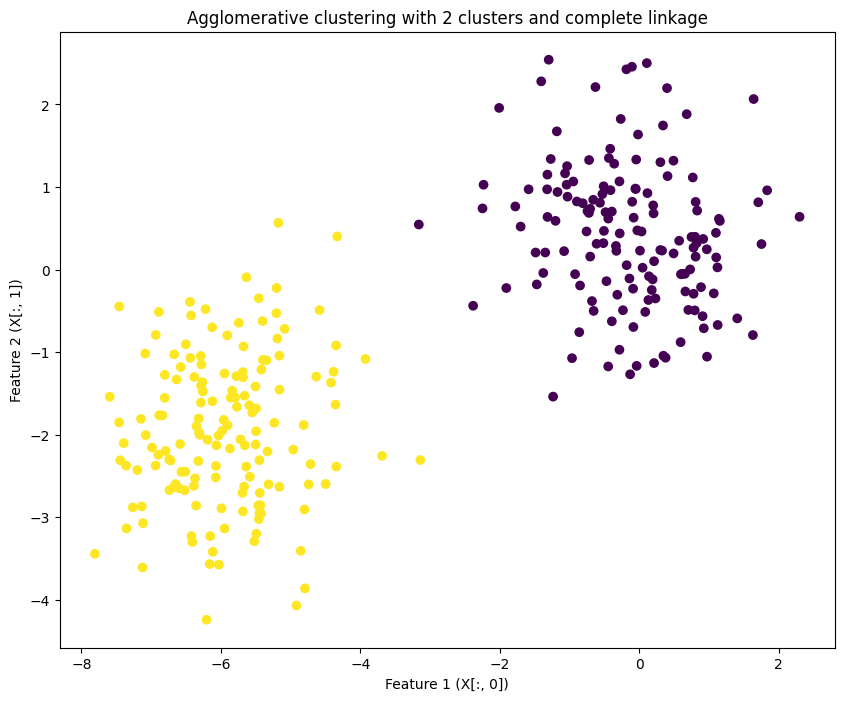

In [71]:
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=clustering.labels_)
plt.title("Agglomerative clustering with 2 clusters and complete linkage")
plt.xlabel("Feature 1 (X[:, 0])")
plt.ylabel("Feature 2 (X[:, 1])")
plt.show()

In [72]:
clustering = AgglomerativeClustering(n_clusters=2, linkage='single')
clustering.fit(X)

AgglomerativeClustering(linkage='single')

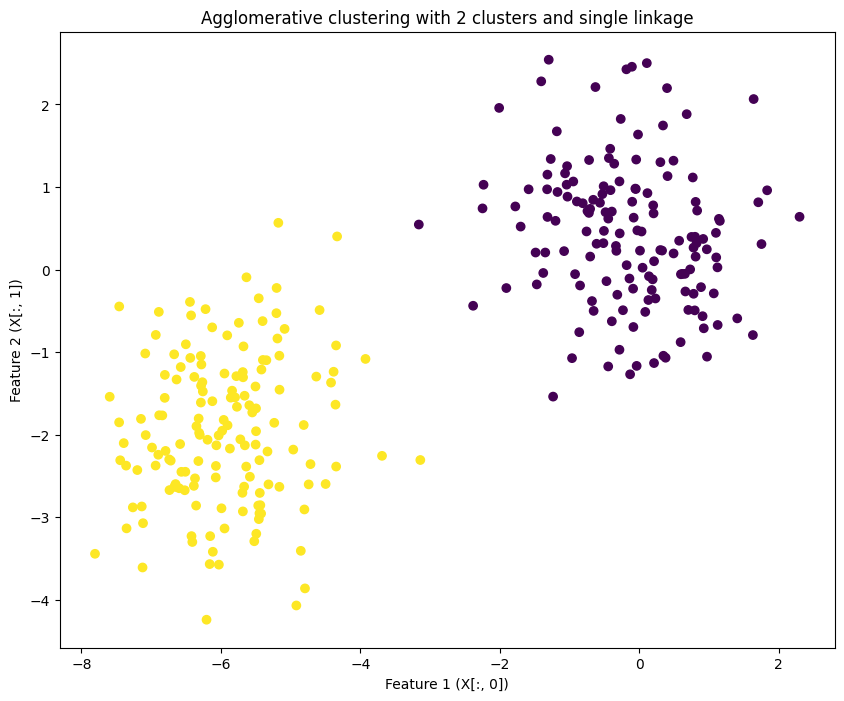

In [73]:
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=clustering.labels_)
plt.title("Agglomerative clustering with 2 clusters and single linkage")
plt.xlabel("Feature 1 (X[:, 0])")
plt.ylabel("Feature 2 (X[:, 1])")
plt.show()

In [74]:
clustering = AgglomerativeClustering(n_clusters=2, linkage='average')
clustering.fit(X)

AgglomerativeClustering(linkage='average')

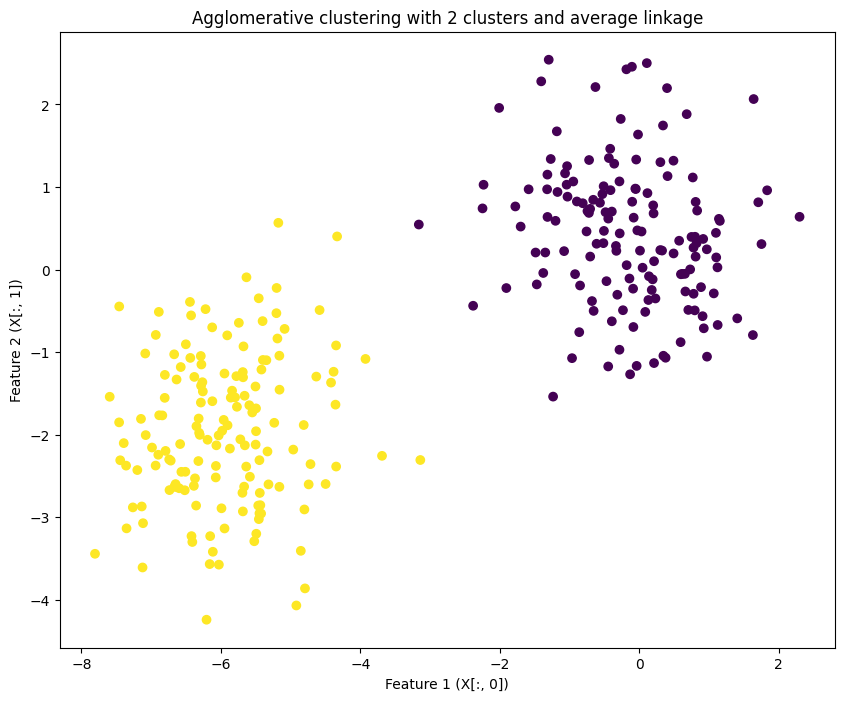

In [75]:
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=clustering.labels_)
plt.title("Agglomerative clustering with 2 clusters and average linkage")
plt.xlabel("Feature 1 (X[:, 0])")
plt.ylabel("Feature 2 (X[:, 1])")
plt.show()

In [76]:
clustering = AgglomerativeClustering(n_clusters=3, linkage='single')
clustering.fit(X)

AgglomerativeClustering(linkage='single', n_clusters=3)

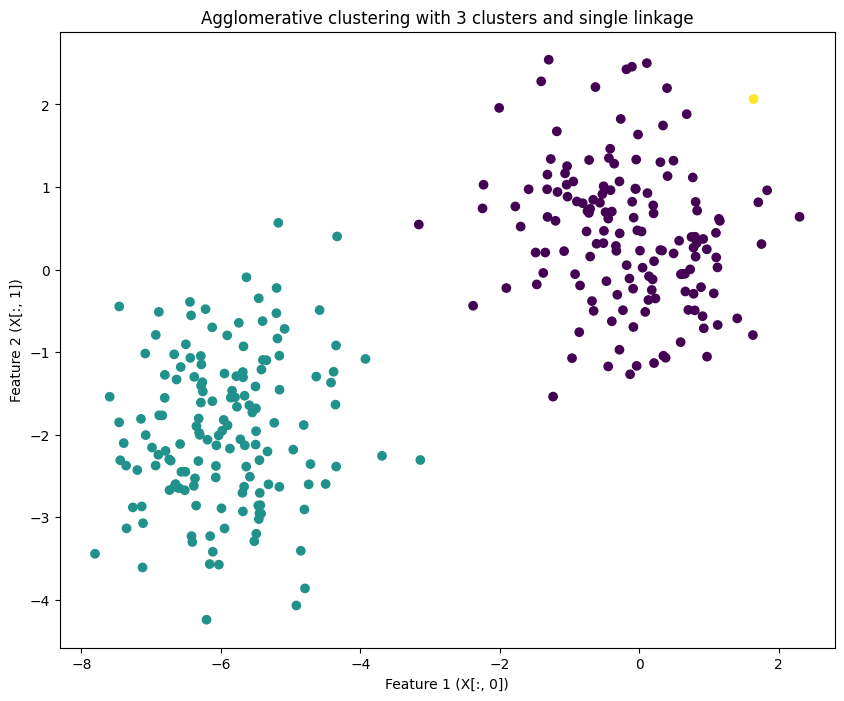

In [77]:
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=clustering.labels_)
plt.title("Agglomerative clustering with 3 clusters and single linkage")
plt.xlabel("Feature 1 (X[:, 0])")
plt.ylabel("Feature 2 (X[:, 1])")
plt.show()

In [78]:
X, _ = make_blobs(n_samples=500, centers=3, n_features=2, cluster_std=0.95)

In [79]:
clustering = AgglomerativeClustering(n_clusters=3, linkage='single')
clustering.fit(X)

AgglomerativeClustering(linkage='single', n_clusters=3)

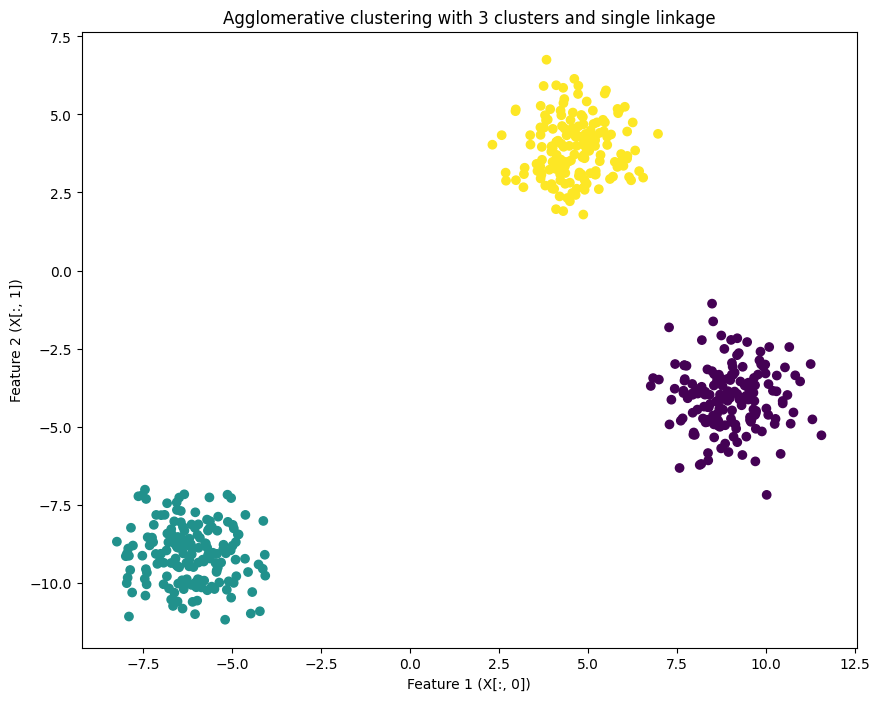

In [80]:
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=clustering.labels_)
plt.title("Agglomerative clustering with 3 clusters and single linkage")
plt.xlabel("Feature 1 (X[:, 0])")
plt.ylabel("Feature 2 (X[:, 1])")
plt.show()

In [81]:
clustering = AgglomerativeClustering(n_clusters=3, linkage='average')
clustering.fit(X)

AgglomerativeClustering(linkage='average', n_clusters=3)

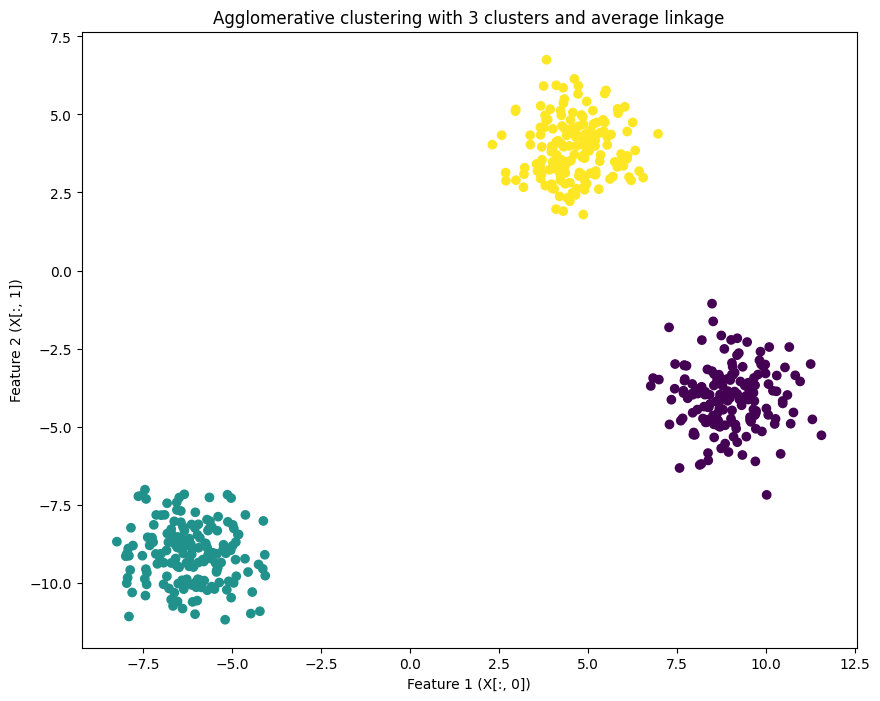

In [82]:
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=clustering.labels_)
plt.title("Agglomerative clustering with 3 clusters and average linkage")
plt.xlabel("Feature 1 (X[:, 0])")
plt.ylabel("Feature 2 (X[:, 1])")
plt.show()

In [83]:
X = np.append(X, [[0, 0]], axis=0)

In [84]:
X

array([[ -5.56623537,  -8.21903274],
       [  4.85491258,   4.03549541],
       [  6.98594302,  -3.49293876],
       ...,
       [ -4.95637301, -10.00570693],
       [  8.73831096,  -2.08067951],
       [  0.        ,   0.        ]])

In [85]:
clustering = AgglomerativeClustering(n_clusters=3, linkage='average')
clustering.fit(X)

AgglomerativeClustering(linkage='average', n_clusters=3)

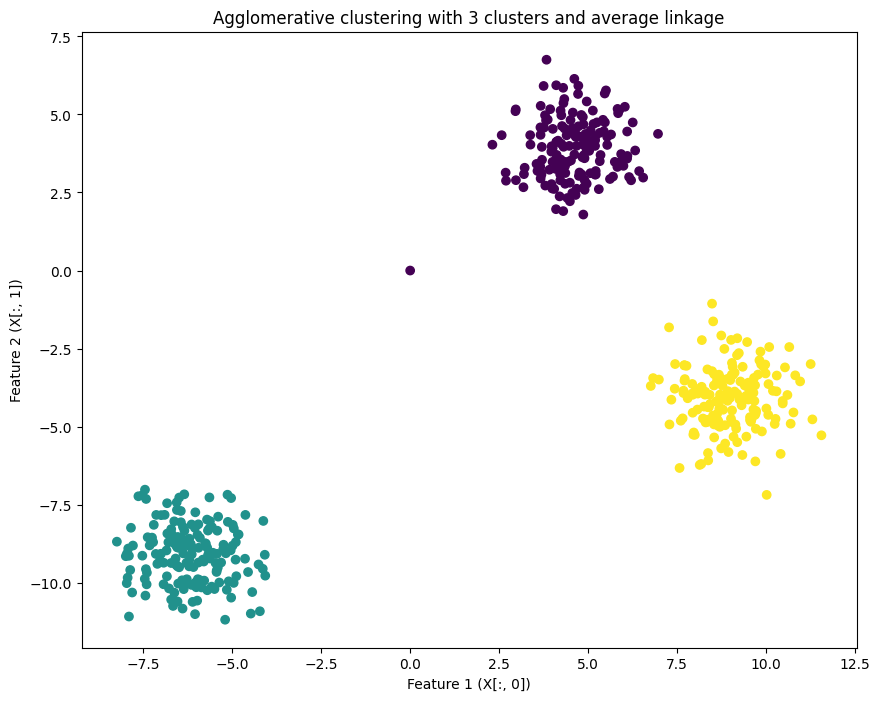

In [86]:
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=clustering.labels_)
plt.title("Agglomerative clustering with 3 clusters and average linkage")
plt.xlabel("Feature 1 (X[:, 0])")
plt.ylabel("Feature 2 (X[:, 1])")
plt.show()